# **PROJECT 2: IMAGE PROCESSING**
**Subject:** Applied Mathematics and Statistics <br>

## **Table of content**
* [Import librabries](#c1)
* [Printing function](#c2)
* [Saving function](#c3)
* [Image processing](#c4)
  * [Adjust brightness](#c41)
  * [Adjust contrast](#c42)
  * [Flip image](#c43)
  * [Convert image from RGB to grayscale/sepia](#c44)
  * [Blur/Sharpen the image](#c45)
  * [Crop the image (Center crop)](#c46)
  * [Circular crop](#c47)
* [Do everything function](#c5)
* [Main function](#c6)

## **Import librabries** <a class="achor" id="c1"></a>

In [ ]:
import numpy as np
from PIL import Image
import matplotlib as mpl
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Printing function** <a class="achor" id="c2"></a>

In [ ]:
def print_img(original_img, img_lib, img_name):
  '''
  Print out the original image along with the processed images

  Input:
    original_img: np.ndarray
      An original input image with in ndarry format

    img_lib: np.ndarray[]
      An array of image that have been processed

    img_name: np.ndarray[]
      An array of image names in string that go with the process image
  '''
  # Create subplot to print images
  fig, axis = plt.subplots(1, len(img_lib) + 1, figsize=(10, 10))

  # Printing image
  axis[0].set_title(f'Original Image')
  axis[0].imshow(original_img)
  axis[0].axis('off')

  for i in range(len(img_lib)):
    axis[i + 1].set_title(img_name[i])
    axis[i + 1].imshow(img_lib[i], cmap='gray')
    axis[i + 1].axis('off')
  plt.tight_layout();

## **Saving function** <a class="achor" id="c3"></a>

In [ ]:
def save_img(img_lib, img_name):
  '''
  Save image into the folder of the original image

  Input:
    img_lib: np.ndarray[]
      An array of image that need to be saved

    img_name: np.ndarray[]
      An array of image names in string that are used to save the processed image
  '''
  for i in range(len(img_lib)):
    # converts the image to a PIL Image object
    save_img = Image.fromarray(img_lib[i])

    # Replaces any spaces in the name with underscores
    save_name = img_name[i].replace(' ','_')

    # Save the image to the folder of the original image as a PNG
    save_img.save(f'{path}/{save_name}.png', "PNG")

## **Image processing** <a class="achor" id="c4"></a>

### **1. Adjust brightness** <a class="achor" id="c41"></a>

In [ ]:
def adjust_brightness(img, brightness):
  '''
  Adjust the brightness of an image

  Input:
    img: np.ndarray
      An image with in ndarry format

    brightness: int
      Brightness value to adjust the brightness

  Output:
    new_img: np.ndarray
      A new image that have been adjusted the brightness
  '''
  # Create a numpy array with provided brightness value as a 'mask'
  brightness_mask = np.array([brightness], dtype=np.int16)

  # Add the 'mask' on the the original image and limit the value range from [0; 255]
  new_img = np.uint8(np.clip(img + brightness_mask, 0, 255))

  return new_img

In [ ]:
def brightness_process(img, img_name, brightness_up = 50, brightness_down = -50):
  # Create an image librabry for printing
  img_lib = []
  img_name_lib = []

  # Process the image and add them to librabry
  new_img_up = adjust_brightness(img, brightness_up)
  img_lib.append(new_img_up)
  new_img_down = adjust_brightness(img, brightness_down)
  img_lib.append(new_img_down)

  # Processing image name and creating subplot for printing
  img_name_lib.append(f'{img_name} brightness {brightness_up}')
  img_name_lib.append(f'{img_name} brightness {brightness_down}')

  # Printing and saving images
  print_img(img, img_lib, img_name_lib)
  save_img(img_lib, img_name_lib)

### **2. Adjust contrast** <a class="achor" id="c42"></a>

In [ ]:
def adjust_contrast(img, contrast):
  '''
  Adjust the contrast of an image

  Input:
    img: np.ndarray
      An image with in ndarry format

    contrast: int
      Contrast value to adjust the contrast

  Output:
    new_img: np.ndarray
      A new image that have been adjusted the contrast
  '''
  # Covert the contrast value to float and limit the value between [-255; 255]
  np.clip(float(contrast), -255, 255)

  # Calculates the contrast adjustment factor based on the given contrast value
  factor = (259 * (contrast + 255)) / (255 * (259 - contrast))

  # Performs the actual contrast adjustment on the image
  new_img = np.uint8(np.clip(factor * (img.astype(float) - 128) + 128, 0, 255))

  return new_img

In [ ]:
def contrast_process(img, img_name, contrast_up = 50, contrast_down = -50):
   # Create an image librabry for printing
  img_lib = []
  img_name_lib = []

  # Process the image and add them to librabry
  new_img_up = adjust_contrast(img, contrast_up)
  img_lib.append(new_img_up)
  new_img_down = adjust_contrast(img, contrast_down)
  img_lib.append(new_img_down)

  # Processing image name and creating subplot for printing
  img_name_lib.append(f'{img_name} contrast {contrast_up}')
  img_name_lib.append(f'{img_name} contrast {contrast_down}')

  # Printing and saving images
  print_img(img, img_lib, img_name_lib)
  save_img(img_lib, img_name_lib)

### **3. Flip the image (Horizontal/Vertical)**  <a class="achor" id="c43"></a>

In [ ]:
def flip_img(img):
  '''
  Flip the image horizontally and vertically

  Input:
    img: np.ndarray
      An image with in ndarry format

  Output:
    new_img: np.ndarray
      A new image that have been flipped accordingly
  '''
  # Flip horizontal by slicing
  # (select all the rows and select all the columns in reverse)
  horizontal_img = img[:, ::-1]

  # Flip vertical by slicing
  # (select all the columns and select all the rows in reverse)
  vertical_img = img[::-1, :]

  return horizontal_img, vertical_img

In [ ]:
def flip_process(img, img_name):
   # Create an image librabry for printing
  img_lib = []
  img_name_lib = []

  # Process the image and add them to librabry
  horizontal_img, vertical_img = flip_img(img)
  img_lib.append(horizontal_img)
  img_lib.append(vertical_img)

  # Processing image name and creating subplot for printing
  img_name_lib.append(f'{img_name} flip horizontal')
  img_name_lib.append(f'{img_name} flip vertical')

  # Printing and saving images
  print_img(img, img_lib, img_name_lib)
  save_img(img_lib, img_name_lib)

### **4. Convert image from RGB to grayscale/sepia** <a class="achor" id="c44"></a>

#### **4a. Convert to grayscale**
Apply the [grayscale formula](https://bit.ly/44Rjc7Y) of 0.299 ∙ Red + 0.587 ∙ Green + 0.114 ∙ Blue

In [ ]:
def grayscale(img):
  '''
  Convert the image from RGB format to grayscale

  Input:
    img: np.ndarray
      An image with in ndarry format

  Output:
    new_img: np.ndarray
      A new image that have been converted into grayscale
  '''
  # Define the weights for each color channel
  weight = np.array([0.299, 0.587, 0.114])

  # Extract the three color channels using slicing
  img_rgb = img[..., :3]

  # Perform a dot product of the color channels with the weights to get the grayscale values
  grayscale_img = np.dot(img_rgb, weight)

  # Limit the value of each pixel to [0, 255]
  new_img = np.uint8(np.clip(grayscale_img, 0, 255))

  return new_img

#### **4b. Convert to sepia**
Apply the [sepia formula](https://dyclassroom.com/image-processing-project/how-to-convert-a-color-image-into-sepia-image) of:
* tr = 0.393R + 0.769G + 0.189B
* tg = 0.349R + 0.686G + 0.168B
* tb = 0.272R + 0.534G + 0.131B

In [ ]:
def sepia(img):
  '''
  Convert the image from RGB format to sepia

  Input:
    img: np.ndarray
      An image with in ndarry format

  Output:
    new_img: np.ndarray
      A new image that have been converted into sepia
  '''
  # Create a sepia convertion matrix
  sepia_matrix = np.array([[0.393, 0.769, 0.189],
                           [0.349, 0.686, 0.168],
                           [0.272, 0.534, 0.131]])

  # Calculate the dot value of the original image with the sepia matrix
  sepia_img = np.dot(img, sepia_matrix.T)

  # Limit the value of the matrix to [0, 255]
  new_img = np.uint8(np.clip(sepia_img, 0, 255))

  return new_img

#### **4c. Processing grayscale/sepia**

In [ ]:
def gray_sepia_process(img, img_name):
  # Create an image librabry for printing
  img_lib = []
  img_name_lib = []

  # Process the image and add them to librabry
  new_img_grayscale = grayscale(img)
  img_lib.append(new_img_grayscale)
  new_img_sepia = sepia(img)
  img_lib.append(new_img_sepia)

  # Processing image name and creating subplot for printing
  img_name_lib.append(f'{img_name} in grayscale')
  img_name_lib.append(f'{img_name} in sepia')

  # Printing and saving images
  print_img(img, img_lib, img_name_lib)
  save_img(img_lib, img_name_lib)

### **5. Blur/Sharpen the image** <a class="achor" id="c45"></a>

#### **5a. Blur**
Use the [kernel for box blur](https://en.wikipedia.org/wiki/Kernel_(image_processing)) <br>

![img](https://i.imgur.com/o1VoFDq.png)

Image source [here](https://youtu.be/4Eh0y3LHTNU)

In [ ]:
def box_blur(img, r = 2):
  '''
  Blur the input image using box blur

  Input:
    img: np.ndarray
      An image with in ndarry format

    r: int
      The radius of the kernel (bigger radius for more blur)

  Output:
    new_img: np.ndarray
      A new image that have been blurred by box blur
  '''
  # Calculate the kernel size from the input radius and create the kernel
  kernel_size = 2 * r + 1
  kernel = np.ones((kernel_size, kernel_size)) / (kernel_size ** 2)

  # Retrieve the width height of the image
  height, width, _ = img.shape

  # Convert image into grayscale and create an empty array for processing
  img = np.dot(img[..., :3], [0.299, 0.587, 0.114])
  blurred_image = np.zeros_like(img)

  # Add padding to the edge of the image
  padded_img = np.pad(img, kernel_size // 2, mode='edge')

  for x in range(1, width - 1):
    for y in range(1, height - 1):
      blurred_image[x, y] = np.sum(padded_img[x:x + kernel_size, y:y + kernel_size] * kernel)

  # Limit the pixel value within [0, 255]
  new_img = np.uint8(np.clip(blurred_image, 0, 255))

  return new_img

#### **5b. Sharpen**
Use the [kernel for sharpening](https://en.wikipedia.org/wiki/Kernel_(image_processing))
$$
\begin{bmatrix}
  0 & -1 & 0 \\
  -1 & 5 & -1 \\
  0 & -1 & 0
\end{bmatrix}
$$

In [ ]:
def sharpen(img):
  '''
  Sharpen the input image using box blur

  Input:
    img: np.ndarray
      An image with in ndarry format

  Output:
    new_img: np.ndarray
      A new image that have been sharpen
  '''
  # Create the kernel
  kernel = np.array([[0, -1, 0],
                     [-1, 5, -1],
                     [0, -1, 0]])

  # Retrieve the width height of the image
  height, width, _ = img.shape

  # Convert image into grayscale and dreate an empty array for processing
  img = np.dot(img[..., :3], [0.299, 0.587, 0.114])
  sharpen_img = np.zeros_like(img)

  # Add padding to the edge of the image
  padded_img = np.pad(img, 1, mode='edge')

  # Take the neighboring pixels of each pixel and create a matrix same size as kernel
  # Multiply it with the kernel and sum all of it, the result is assign to the corresponding pixel in the blurred image
  for x in range(1, width - 1):
    for y in range(1, height - 1):
     sharpen_img[x, y] = np.sum(padded_img[x - 1:x + 2, y - 1:y + 2] * kernel)

  # Limit the pixel value within [0, 255]
  new_img = np.uint8(np.clip(sharpen_img, 0, 255))

  return new_img

#### **5c. Process Blur/Sharpen**

In [ ]:
def blur_sharp_process(img, img_name):
  # Create an image librabry for printing
  img_lib = []
  img_name_lib = []

  # Process the image and add them to librabry
  new_img_blur = box_blur(img)
  img_lib.append(new_img_blur)
  new_img_sharp = sharpen(img)
  img_lib.append(new_img_sharp)

  # Processing image name and creating subplot for printing
  img_name_lib.append(f'{img_name} blur')
  img_name_lib.append(f'{img_name} sharpen')

  # Printing and saving images
  print_img(img, img_lib, img_name_lib)
  save_img(img_lib, img_name_lib)

### **6. Crop the image (Center crop)** <a class="achor" id="c46"></a>

In [ ]:
def center_crop(img, size = 250):
  '''
  Crop the image by the input size (center crop)

  Input:
    img: np.ndarray
      An image with in ndarry format

    size: int
      Size of the cropped image

  Output:
    new_img: np.ndarray
      A new image that have been cropped with the input size
  '''
  # Get the width and height of the image
  w, h, _ = img.shape

  # Check if the crop size is bigger than the original image's dimension
  if size > w or size > h:
    print("Crop size too big!")
    return

  # Calculate the top, bottom, left, right index to crop accordingly
  left = (w - size) // 2
  top = (h - size) // 2
  right = left + size
  bottom = top + size

  # Crop the image using NumPy array slicing
  new_img = np.uint8(img[top:bottom, left:right])

  return new_img

In [ ]:
def crop_process(img, img_name, size = 250):
   # Create an image librabry for printing
  img_lib = []
  img_name_lib = []

  # Process the image and add them to librabry
  new_img_crop = center_crop(img, size)
  img_lib.append(new_img_crop)

  # Processing image name and creating subplot for printing
  img_name_lib.append(f'{img_name} center crop')

  # Printing and saving images
  print_img(img, img_lib, img_name_lib)
  save_img(img_lib, img_name_lib)

### **7. Circular crop** <a class="achor" id="c47"></a>

In [ ]:
def circular_crop(img):
  '''
  Crop the image with a circular crop

  Input:
    img: np.ndarray
      An image with in ndarry format

  Output:
    new_img: np.ndarray
      A new image that have been cropped with a circular crop
  '''
  # Get the width and height of the image and create a copy of the original image to process on
  w, h, _ = img.shape
  new_img = img.copy()

  # Calculate the index of the center of the image and the radius
  center = (int(w/2), int(h/2))
  radius = min(w, h) // 2

  # Creates two 2D arrays Y and X representing the grid of pixel
  Y, X = np.ogrid[:h, :w]

  # Calculates the Euclidean distance from each pixel to the center of the image
  # Creates a boolean mask where the value is True for pixels inside circular region
  circular_mask = np.sqrt((X - center[0]) ** 2 + (Y - center[1]) ** 2) <= radius

  # Sets the pixel values outside the circular to 0
  new_img[~circular_mask] = 0

  return new_img

In [ ]:
def circular_process(img, img_name):
  # Create an image librabry for printing
  img_lib = []
  img_name_lib = []

  # Process the image and add them to librabry
  new_img_crop = circular_crop(img)
  img_lib.append(new_img_crop)

  # Processing image name and creating subplot for printing
  img_name_lib.append(f'{img_name} circular crop')

  # Printing and saving images
  print_img(img, img_lib, img_name_lib)
  save_img(img_lib, img_name_lib)

### **8. Ellipses crop**

In [ ]:
def ellipses_crop(img):
  '''
  Crop the image with a two ellipses symmetrically overlapping

  Input:
    img: np.ndarray
      An image with in ndarry format

  Output:
    new_img: np.ndarray
      A new image that have been cropped with a the ellipses mask
  '''
  # Get the width and height of the image and create a copy of the original image to process on
  w, h, _ = img.shape
  new_img = img.copy()

  # Calculate the center, the semi-major, semi-minor of the ellipse and the radius
  center = (int(w/2), int(h/2))
  s_major = w
  s_minor = w / (np.sqrt(2) + 1.5)
  radius = min(w, h) // 2

  # Creates two 2D arrays Y and X representing the grid of pixel
  Y, X = np.ogrid[:h,:w]

  # Caluculate the arguments for calculation
  dist1 = (X - center[1]) + (Y - center[0])
  dist2 = (X - center[1]) - (Y - center[0])

  # Calculate the Euclidean distance from each pixel to the center of the image
  # Creates a boolean mask where the value is True for pixels inside circular region
  mask1 = (-dist2)**2/(s_major*np.sqrt(2)) + (dist1)**2/(s_minor*np.sqrt(2)) <= radius
  mask2 = (dist1)**2/(s_major*np.sqrt(2)) + (-dist2)**2/(s_minor*np.sqrt(2)) <= radius

  # Sets the pixel values outside the ellipses mask to 0
  new_img[~(mask1 | mask2)] = 0

  return new_img

In [ ]:
def ellipses_process(img, img_name):
  # Create an image librabry for printing
  img_lib = []
  img_name_lib = []

  # Process the image and add them to librabry
  new_img_crop = ellipses_crop(img)
  img_lib.append(new_img_crop)

  # Processing image name and creating subplot for printing
  img_name_lib.append(f'{img_name} ellipses crop')

  # Printing and saving images
  print_img(img, img_lib, img_name_lib)
  save_img(img_lib, img_name_lib)

## **Do everything function** <a class="achor" id="c5"></a>

In [ ]:
def do_all(img, img_name):
  brightness_process(img, img_name)
  contrast_process(img, img_name)
  flip_process(img, img_name)
  gray_sepia_process(img, img_name)
  blur_sharp_process(img, img_name)
  crop_process(img, img_name)
  circular_process(img, img_name)
  ellipses_process(img, img_name)

## **Main function** <a class="achor" id="c6"></a>

In [ ]:
def main():
  # Enter image name
  img_name = input('Enter image name: ')

  # Open and convert the image to a numpy array
  img = Image.open(f'{path}/{img_name}')
  init_img = np.array(img)

  # Get the image name without the extension for saving purposes
  img_name = img_name.split('.')[0]

  # User choose the function
  choice = int(input("""
  0. Do everything! (With their default settings)
  1. Adjust brightness (Default +50/-50)
  2. Adjust contrast (Default +50/-50)
  3. Flip image
  4. Grayscale/Sepia
  5. Blur/Sharpen image
  6. Crop image (Default 250x250)
  7. Circular crop
  8. Ellipses crop
  9. Exit
  Your choice: """))

  # Proces the user choice
  if choice == 0:
    do_all(init_img, img_name)
  elif choice == 1:
    brightness_lv = int(input("Enter brightness level [-255; 255]: "))
    brightness_process(init_img, img_name, brightness_lv, -brightness_lv)
  elif choice == 2:
    contrast_lv = int(input("Enter contrast level [-255; 255]: "))
    contrast_process(init_img, img_name, contrast_lv, -contrast_lv)
  elif choice == 3:
    flip_process(init_img, img_name)
  elif choice == 4:
    gray_sepia_process(init_img, img_name)
  elif choice == 5:
    blur_sharp_process(init_img, img_name)
  elif choice == 6:
    crop_size = int(input("Enter crop size: "))
    crop_process(init_img, img_name, crop_size)
  elif choice == 7:
    circular_process(init_img, img_name)
  elif choice == 8:
    ellipses_process(init_img, img_name)
  elif choice == 9:
    return

Enter image name: Peppers.png

  0. Do everything! (With their default settings)
  1. Adjust brightness (Default +50/-50)
  2. Adjust contrast (Default +50/-50)
  3. Flip image
  4. Grayscale/Sepia
  5. Blur/Sharpen image
  6. Crop image (Default 250x250)
  7. Circular crop
  8. Ellipses crop
  9. Exit
  Your choice: 8


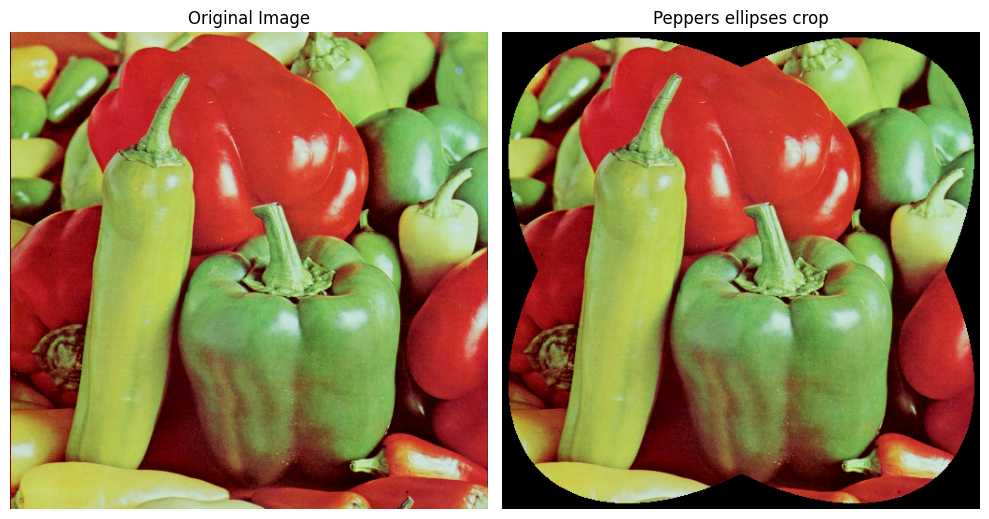

In [ ]:
main()